# Тестовое задание. Гизатуллин Тимур
## Описание задачи
Суть задания заключается в проверке двух гипотез:
1) Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.
2) Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

по данным о количестве больничных дней для каждого сотрудника с указанием его возраста и пола за последний год(предположительно).


Гипотезы можно переформулировать так:
$$1. \mu([Male > 2]) \gg \mu([Female > 2])$$
$$2. \mu([Elder > 2]) \gg \mu([Younger > 2])$$


### Гипотезы будем проверять с уровнем значимости $\alpha = 0.05$

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps


Тут случились проблемы: хотел как можно более правильно реализовать процедуру скачивания архива и, впоследствии .csv файла, чтобы код работал универсально на любой машине(в формате .ipynb файла, а не Streamlit): если файла нет в директории, скачивает архив, разархивирует и использует, а не просто показать скачанный локально на мой компьютер файл и его использование далее, но попробовал и так, и сяк, не получилось, притом, что другие файлы, например, http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz для моей недавней работы по CV работают.

Далее буду делать как обычно, локально, ввиду вышесказанного.


In [2]:
# os.system("wget https://disk.mvideo.ru/s/EDfjMKMFns4e7SN/download/%D0%9C.%D0%A2%D0%B5%D1%85_%D0%A2%D0%97_DS.7z -O data.7z")
# os.system("7z x data.7z && rm data.7z")


In [3]:
# destination = 'М.Тех_ТЗ_DS.7z'
# url = 'https://disk.mvideo.ru/s/EDfjMKMFns4e7SN/download/М.Тех_ТЗ_DS.7z'
# urllib.request.urlretrieve(url, destination)


In [4]:
# import wget
# wget.download('https://disk.mvideo.ru/s/EDfjMKMFns4e7SN/download/%D0%9C.%D0%A2%D0%B5%D1%85_%D0%A2%D0%97_DS.7z')


In [5]:
data = pd.read_csv("/Users/dadaya/Desktop/M.tech/М.Тех_ТЗ_DS/М.Тех_Данные_к_ТЗ_DS.csv", encoding='latin-1', sep = ",")
data.head(10)


,"Êîëè÷åñòâî áîëüíè÷íûõ äíåé,""Âîçðàñò"",""Ïîë"""
0,"5,39,""Æ"""
1,"4,54,""Ì"""
2,"4,26,""Ì"""
3,"5,42,""Ì"""
4,"4,29,""Ì"""
5,"4,38,""Ì"""
6,"1,49,""Æ"""
7,"1,44,""Ì"""
8,"3,42,""Æ"""
9,"4,36,""Ì"""


Как видим, в силу некорректной кодировки, а также неправильного формата разделения: все значения содержатся в одном столбце, нам придется провести некоторые модификации с датафреймом


In [6]:
print(data.head(10))


  Êîëè÷åñòâî áîëüíè÷íûõ äíåé,"Âîçðàñò","Ïîë"
0                                   5,39,"Æ"
1                                   4,54,"Ì"
2                                   4,26,"Ì"
3                                   5,42,"Ì"
4                                   4,29,"Ì"
5                                   4,38,"Ì"
6                                   1,49,"Æ"
7                                   1,44,"Ì"
8                                   3,42,"Æ"
9                                   4,36,"Ì"


In [7]:
data = data[data.columns[0]].str.split(",", expand = True)
data.columns = ["sick_days_amount", 'age', 'sex']
data['sex'] = np.where((data['sex'] == data['sex'][0]), "female", "male") # тут узнал что есть М, а что - Ж по обратной кодировке
data['age'], data['sick_days_amount'] = data['age'].astype('int'), data['sick_days_amount'].astype('int')
print(data.head(10))


   sick_days_amount  age     sex
0                 5   39  female
1                 4   54    male
2                 4   26    male
3                 5   42    male
4                 4   29    male
5                 4   38    male
6                 1   49  female
7                 1   44    male
8                 3   42  female
9                 4   36    male


In [8]:
data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sick_days_amount  237 non-null    int64 
 1   age               237 non-null    int64 
 2   sex               237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


(None,
        sick_days_amount         age
 count        237.000000  237.000000
 mean           3.257384   40.181435
 std            1.807821    6.875157
 min            0.000000   23.000000
 25%            2.000000   36.000000
 50%            3.000000   41.000000
 75%            4.000000   45.000000
 max            8.000000   60.000000)

Все готово! Пусть и с костылями(вполне возможно банально в силу моей прошивки у меня все работает иначе, чем должно), теперь данные в готовом, правильном виде


In [9]:
data.isnull().sum().sum() # в датафрейме нет пропущенных значений


0

Посмотрим, присутствует ли дизбаланс классов:


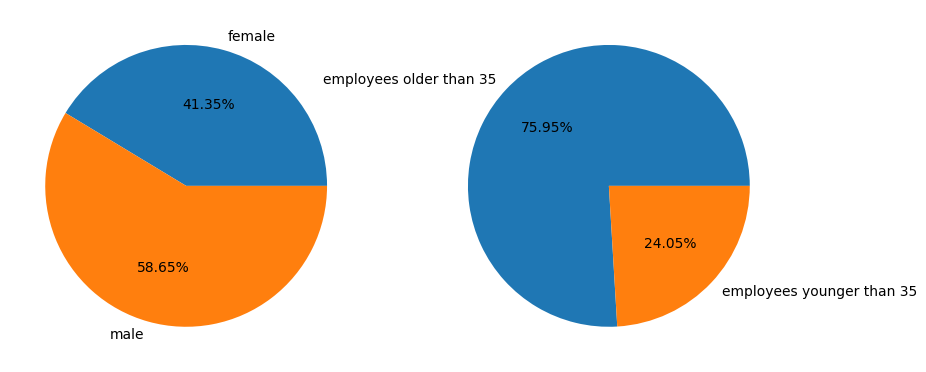

In [10]:
fig, ax = plt.subplots(figsize = (10, 6), ncols = 2)
ax[0].pie([(data['sex'] == 'female').sum(), (data['sex'] == 'male').sum()], labels = ['female', 'male'], autopct = "%1.2f%%")
ax[1].pie([(data['age'] > 35).sum(), (data['age'] <= 35).sum()], labels = ['employees older than 35', 'employees younger than 35'], autopct = "%1.2f%%")
plt.show()
None


Он присутствует, но в силу того, что мы не будем работать с методами, которые плохо работают с несбалансированными классами при проверке гипотез, просто будем иметь в виду, что по-хорошему нужно брать в расчет, что при экстраполяции рассуждений про возраст сотрудников, стоит вспомнить о дисбалансе классов в данной работе


Сохраним в отдельные переменные интересующие нас серии - сотрудников мужчин/женщин, и сотрудников старше 35 лет/не старше 35 лет


In [11]:
male = data['sick_days_amount'][data['sex'] == 'male']
female = data['sick_days_amount'][data['sex'] == 'female']
elder = data['sick_days_amount'][data['age'] > 35]
younger = data['sick_days_amount'][data['age'] <= 35]
male.name, female.name, elder.name, younger.name = "Male", "Female", "Elder", "Younger"


Посмотрим на распределения количества больничных дней людей разного пола и разного возраста:


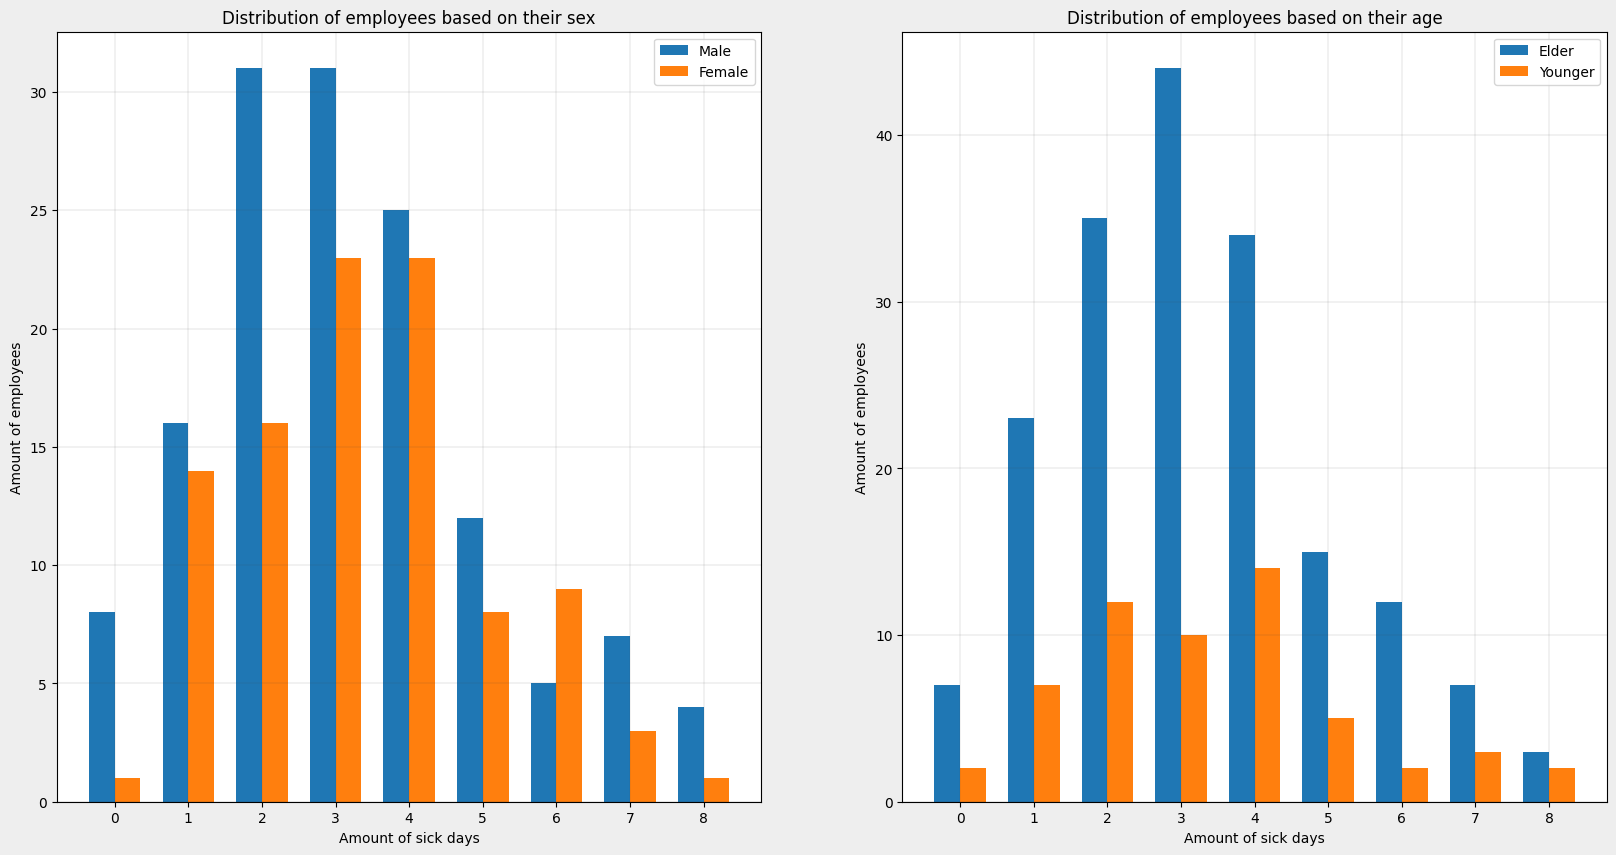

In [12]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))
fig.set(facecolor = '#eee')
x = np.arange(0, 9, 1)
w = 0.35
sick_days_male = np.array([(male == i).sum() for i in x])
sick_days_female = np.array([(female == i).sum() for i in x])
sick_days_elder = np.array([(elder == i).sum() for i in x])
sick_days_younger = np.array([(younger == i).sum() for i in x])
ax[0].bar(x - w / 2, sick_days_male, label = "Male", width = w)
ax[0].bar(x + w / 2, sick_days_female, label = "Female", width = w)
ax[1].bar(x - w / 2, sick_days_elder, label = "Elder", width = w)
ax[1].bar(x + w / 2, sick_days_younger, label = "Younger", width = w)
ax[0].grid(which = 'major', color = '#444', lw = 0.1)
ax[1].grid(which = 'major', color = '#444', lw = 0.1)
ax[0].set_xticks(x), ax[1].set_xticks(x)
ax[0].set_title('Distribution of employees based on their sex'), ax[1].set_title('Distribution of employees based on their age')
ax[0].set_ylabel('Amount of employees'), ax[1].set_ylabel('Amount of employees')
ax[0].set_xlabel('Amount of sick days'), ax[1].set_xlabel('Amount of sick days')
ax[0].legend(), ax[1].legend()
plt.show()
None


Также посмотрим на гистограммы выборок с функцией распределения плотности вероятности значений больничных дней для всех и для > 2 дней:

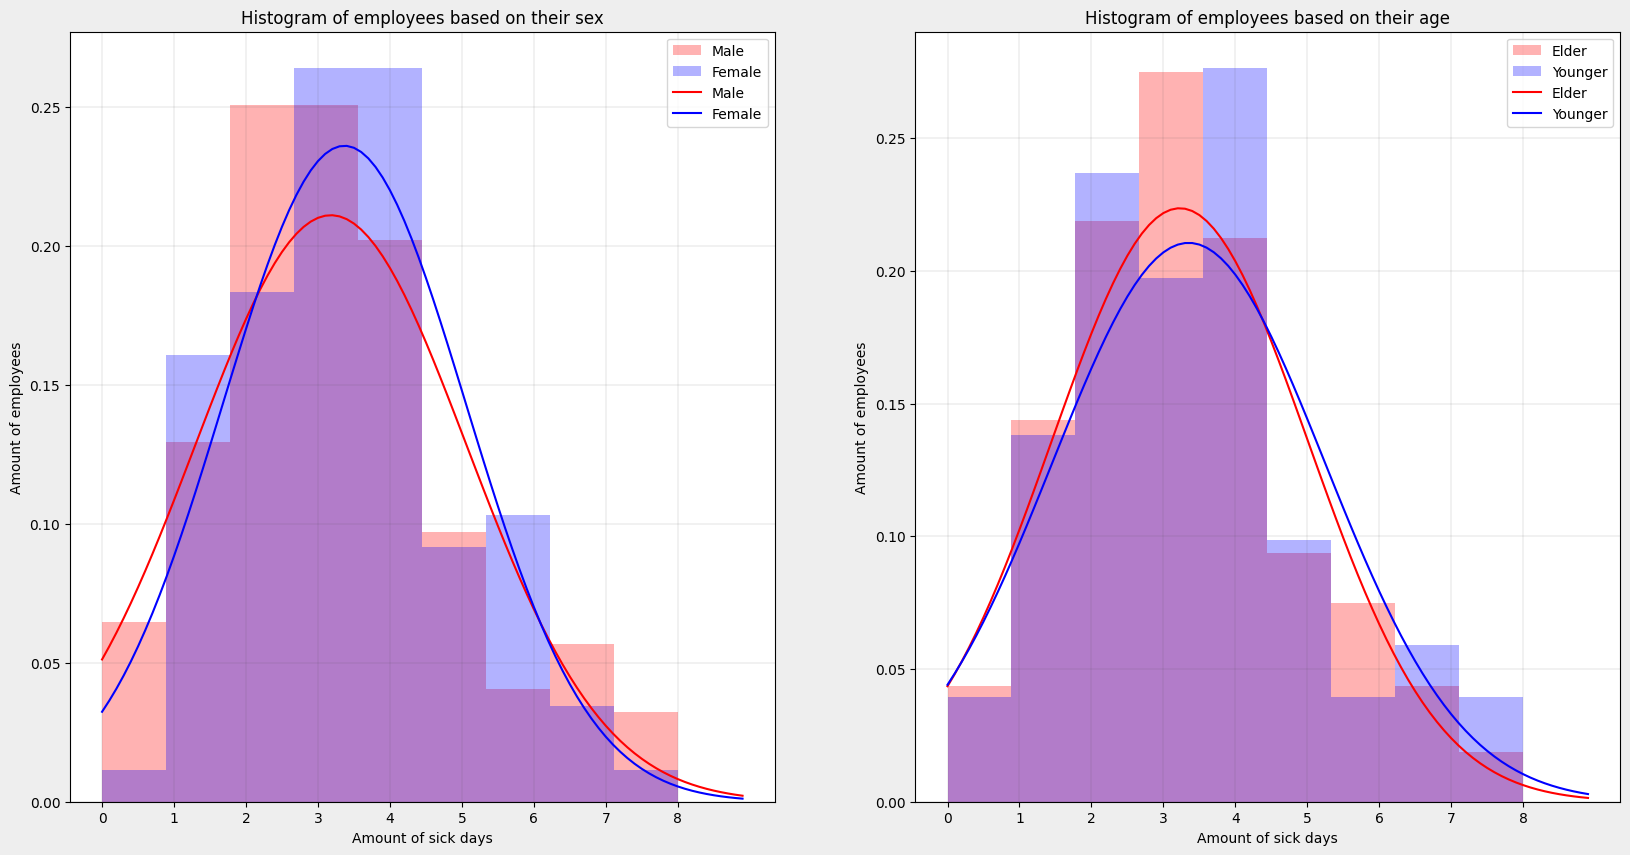

In [13]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))
fig.set(facecolor = '#eee')
x = np.arange(0, 9, 1)
x_1 = np.arange(0, 9, 0.1)
ax[0].hist(male, density = True, color = "red", label = "Male", alpha = 0.3, bins = 9)
ax[0].hist(female, density = True, color = "blue", label = "Female", alpha = 0.3, bins = 9)
ax[0].plot(x_1, sps.norm(male.mean(), male.std()).pdf(x_1), color = "red", label = "Male")
ax[0].plot(x_1, sps.norm(female.mean(), female.std()).pdf(x_1), color = "blue", label = "Female")
ax[1].hist(elder, density = True, color = "red", label = "Elder", alpha = 0.3, bins = 9)
ax[1].hist(younger, density = True, color = "blue", label = "Younger", alpha = 0.3, bins = 9)
ax[1].plot(x_1, sps.norm(elder.mean(), elder.std()).pdf(x_1), color = "red", label = "Elder")
ax[1].plot(x_1, sps.norm(younger.mean(), younger.std()).pdf(x_1), color = "blue", label = "Younger")
ax[0].grid(which = 'major', color = '#444', lw = 0.1)
ax[1].grid(which = 'major', color = '#444', lw = 0.1)
ax[0].set_xticks(x), ax[1].set_xticks(x)
ax[0].set_title('Histogram of employees based on their sex'), ax[1].set_title('Histogram of employees based on their age')
ax[0].set_ylabel('Amount of employees'), ax[1].set_ylabel('Amount of employees')
ax[0].set_xlabel('Amount of sick days'), ax[1].set_xlabel('Amount of sick days')
ax[0].legend(), ax[1].legend()
plt.show()
None


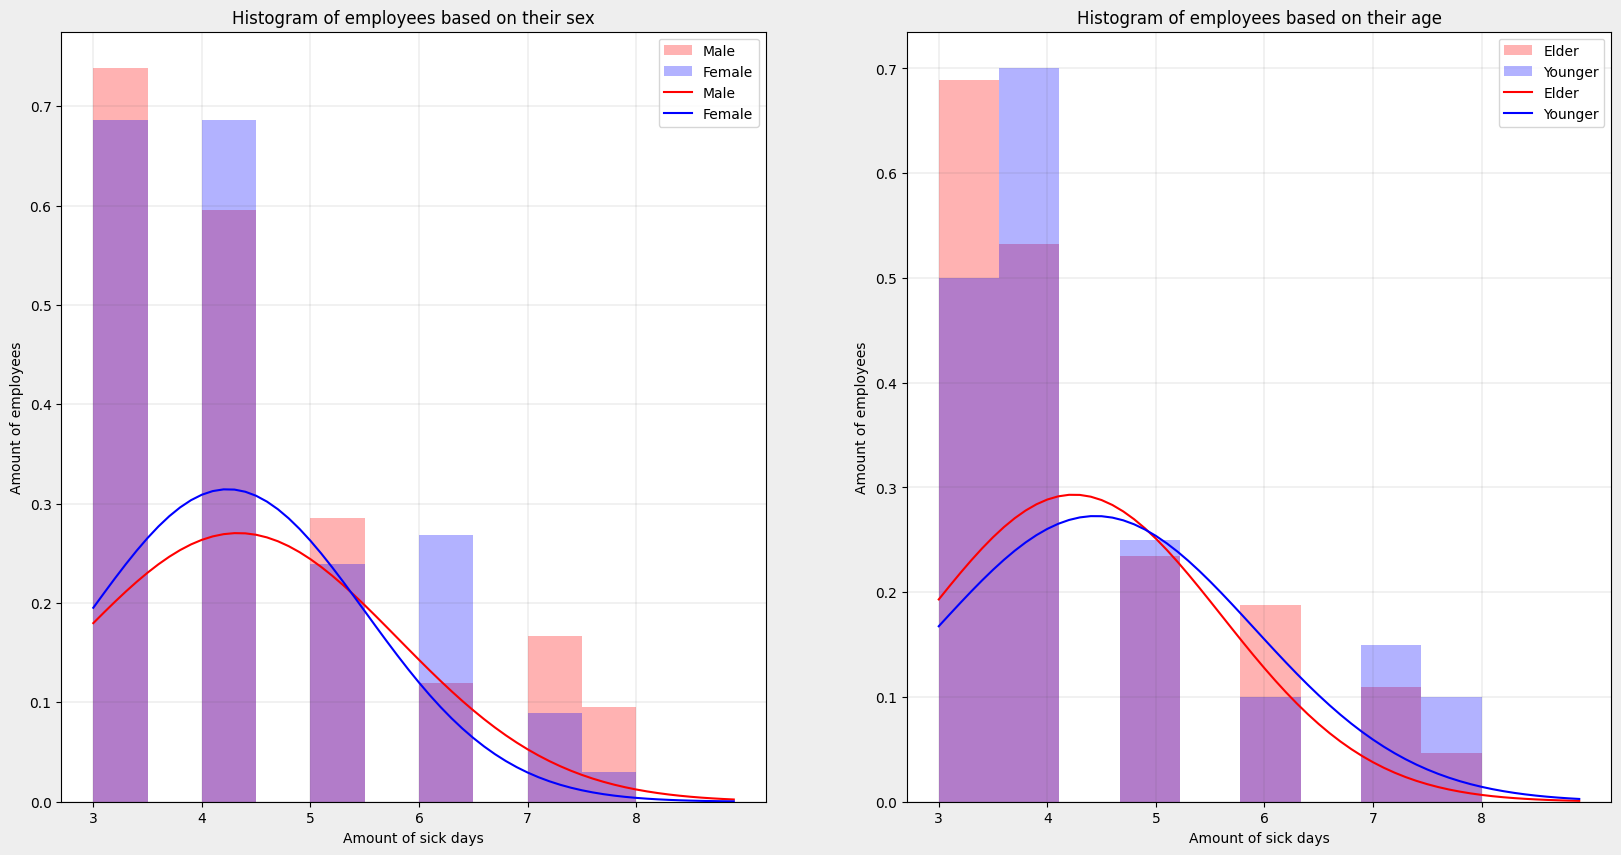

In [14]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))
fig.set(facecolor = '#eee')
x = np.arange(3, 9, 1)
x_1 = np.arange(3, 9, 0.1)
ax[0].hist(male[male > 2], density = True, color = "red", label = "Male", alpha = 0.3)
ax[0].hist(female[female > 2], density = True, color = "blue", label = "Female", alpha = 0.3)
ax[0].plot(x_1, sps.norm(male[male > 2].mean(), male[male > 2].std()).pdf(x_1), color = "red", label = "Male")
ax[0].plot(x_1, sps.norm(female[female > 2].mean(), female[female > 2].std()).pdf(x_1), color = "blue", label = "Female")
ax[1].hist(elder[elder > 2], density = True, color = "red", label = "Elder", alpha = 0.3, bins = 9)
ax[1].hist(younger[younger > 2], density = True, color = "blue", label = "Younger", alpha = 0.3, bins = 9)
ax[1].plot(x_1, sps.norm(elder[elder > 2].mean(), elder[elder > 2].std()).pdf(x_1), color = "red", label = "Elder")
ax[1].plot(x_1, sps.norm(younger[younger > 2].mean(), younger[younger > 2].std()).pdf(x_1), color = "blue", label = "Younger")
ax[0].grid(which = 'major', color = '#444', lw = 0.1)
ax[1].grid(which = 'major', color = '#444', lw = 0.1)
ax[0].set_xticks(x), ax[1].set_xticks(x)
ax[0].set_title('Histogram of employees based on their sex'), ax[1].set_title('Histogram of employees based on their age')
ax[0].set_ylabel('Amount of employees'), ax[1].set_ylabel('Amount of employees')
ax[0].set_xlabel('Amount of sick days'), ax[1].set_xlabel('Amount of sick days')
ax[0].legend(), ax[1].legend()
plt.show()
None


In [15]:
print("Среднее количество пропущенных дней сотрудников старше 35 лет:", elder.mean())
print("Среднее количество пропущенных дней сотрудников не старше 35 лет:", younger.mean(), "\n")
print("Среднее количестов пропущенных дней сотрудников-мужчин:", male.mean())
print("Среднее количестов пропущенных дней сотрудников-женщин:", female.mean())


Среднее количество пропущенных дней сотрудников старше 35 лет: 3.227777777777778
Среднее количество пропущенных дней сотрудников не старше 35 лет: 3.3508771929824563 

Среднее количестов пропущенных дней сотрудников-мужчин: 3.179856115107914
Среднее количестов пропущенных дней сотрудников-женщин: 3.36734693877551


In [16]:
print("Среднее количество пропущенных дней(> 2) сотрудников старше 35 лет:", elder[elder > 2].mean())
print("Среднее количество пропущенных дней(> 2) сотрудников не старше 35 лет:", younger[younger > 2].mean(), "\n")
print("Среднее количестов пропущенных дней(> 2) сотрудников-мужчин:", male[male > 2].mean())
print("Среднее количестов пропущенных дней(> 2) сотрудников-женщин:", female[female > 2].mean())


Среднее количество пропущенных дней(> 2) сотрудников старше 35 лет: 4.243478260869566
Среднее количество пропущенных дней(> 2) сотрудников не старше 35 лет: 4.444444444444445 

Среднее количестов пропущенных дней(> 2) сотрудников-мужчин: 4.333333333333333
Среднее количестов пропущенных дней(> 2) сотрудников-женщин: 4.2388059701492535


Посмотрим на гистограммы по доле от общего количества вхождений:

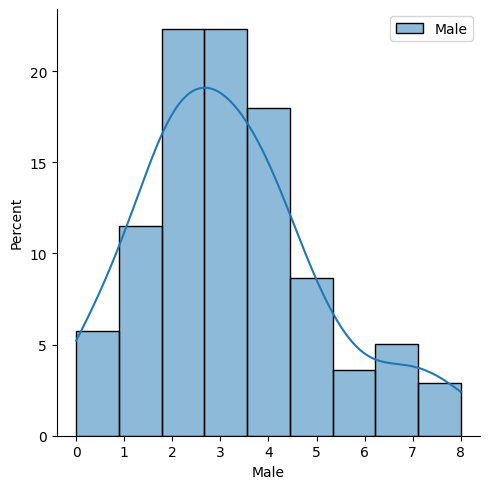

In [17]:
sns.displot(male, kde = True, bins = 9, stat = "percent", label = "Male")
plt.legend()
plt.show()
None


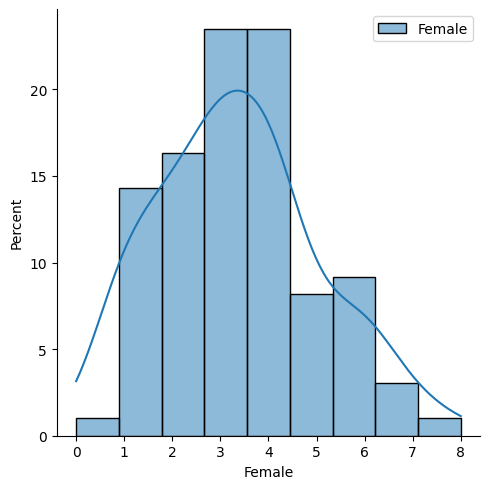

In [18]:
sns.displot(female, kde = True, bins = 9, stat = "percent", label = "Female")
plt.legend()
plt.show()
None


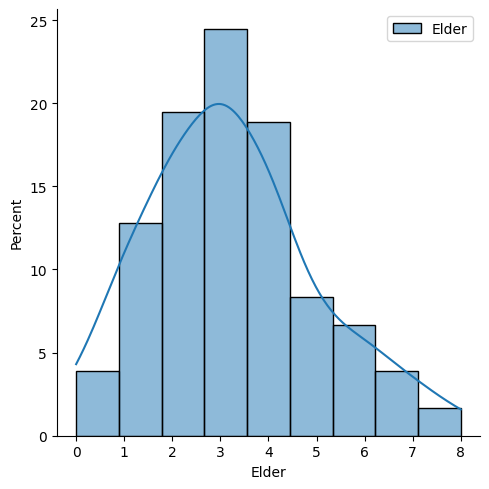

In [19]:
sns.displot(elder, kde = True, bins = 9, stat = "percent", label = "Elder")
plt.legend()
plt.show()
None


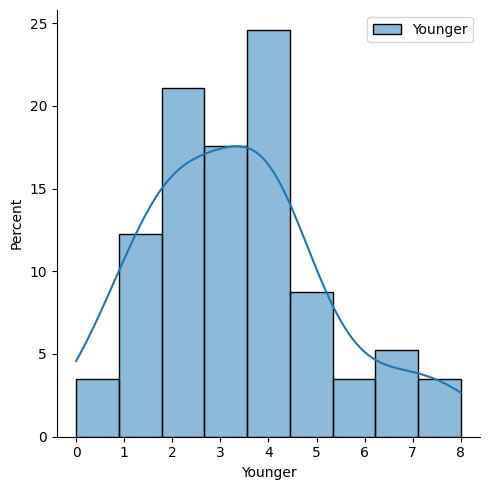

In [20]:
sns.displot(younger, kde = True, bins = 9, stat = "percent", label = "Younger")
plt.legend()
plt.show()
None


Проверим, равны ли дисперсии с помощью критерия Флигнера-Килина:


In [21]:
res = sps.fligner(male, female)
print("p-value for male/female:", res[1])

res = sps.fligner(elder, younger)
print("p-value for elder/younger:", res[1])


p-value for male/female: 0.521300054528677
p-value for elder/younger: 0.577429487644749


### Уже на этом моменте можно сделать промежуточные выводы: визуально гипотезы отвергаются: среднее ни по всем дням, ни по дням, заведомо большим 2, ни у мужчин, ни у сотрудников старше 35, не значительно больше, чем у женщин и сотрудников младше 45 соответсвенно

Как видим, распределения всех подвыборок условно нормальны. Убедимся в этом:


С предположением нормальности распределений посчитаем коэффиценты асимметричности и коэффиценты эксцесса для каждой подвыборки:


In [22]:
print("skew for male:", sps.skew(male))

print("skew for female:", sps.skew(female))

print("skew for elder:", sps.skew(elder))

print("skew for younger:", sps.skew(younger))

print("kurtosis for male:", sps.kurtosis(male))

print("kurtosis for female:", sps.kurtosis(female))

print("kurtosis for elder:", sps.kurtosis(elder))

print("kurtosis for younger:", sps.kurtosis(younger))


skew for male: 0.6067065891837976
skew for female: 0.39155159923496313
skew for elder: 0.49496297808182604
skew for younger: 0.566980016696773
kurtosis for male: 0.06505299465667269
kurtosis for female: -0.3128281110063993
kurtosis for elder: -0.08896906917026026
kurtosis for younger: -0.022074744077901443


Все подвыборки(опять же, в предположении их визуальной условной нормальности) оказываются положительно асимметричными нормальными.

И проведем тест критерием асимметричности и эксцесса:

In [23]:
print("p-value for male:", sps.skewtest(male)[1])

print("p-value for female:", sps.skewtest(female)[1])

print("p-value for elder:", sps.skewtest(elder)[1])

print("p-value for younger:", sps.skewtest(younger)[1])


p-value for male: 0.004241974397249691
p-value for female: 0.1014452240311182
p-value for elder: 0.0073590623737652735
p-value for younger: 0.06675296318279056


p-value недостатчно большой, в силу чего у нас есть достаточно оснований для отвержения гипотезы о нормальности наших выборок.

Подтверждается, что они принадлежат параметрическому семейству распределений, критерием согласия Пирсона:

In [24]:
print("p-value for male:", sps.chisquare(male)[1])

print("p-value for female:", sps.chisquare(female)[1])

print("p-value for elder:", sps.chisquare(elder)[1])

print("p-value for younger:", sps.chisquare(younger)[1])


p-value for male: 0.15452086628661144
p-value for female: 0.8585814797449028
p-value for elder: 0.5390945133682639
p-value for younger: 0.333555647083237


Попробуем проверить принадлежность наших подвыборок к какому-либо семейству распределений из возможных на вид с помощью t-теста Стьюдента:


In [25]:
distributions = {"Norm": sps.norm.cdf,
                 "Laplase": sps.laplace_asymmetric(0.5).cdf,
                 "Expon": sps.expon.cdf,
                 "Cauchy": sps.cauchy.cdf,
                 "Beta": sps.beta(1, 1).cdf,
                 "Chi-square": sps.chi2(0.5).cdf,
                 "Rayleigh": sps.rayleigh.cdf,
                 "Gamma": sps.gamma(3.5).cdf,
                 "Lognorm": sps.lognorm(4).cdf}
samples = {'male': male, 'female': female, 'elder': elder, 'younger': younger}
for distr_name, distr in distributions.items():
    for sample_name, sample in samples.items():
        print(f"p-value for {sample_name} and {distr_name}: {sps.kstest(sample, distr)[1]}" )


p-value for male and Norm: 8.908652653280388e-98
p-value for female and Norm: 1.0975757528513552e-75
p-value for elder and Norm: 4.345015827293062e-129
p-value for younger and Norm: 1.839482506623156e-42
p-value for male and Laplase: 2.067722676412225e-37
p-value for female and Laplase: 1.1659662409248972e-28
p-value for elder and Laplase: 1.8280289611393183e-49
p-value for younger and Laplase: 1.4023716112542122e-16
p-value for male and Expon: 5.999270247596854e-67
p-value for female and Expon: 1.339485166444769e-50
p-value for elder and Expon: 2.5064936119218465e-88
p-value for younger and Expon: 3.5643165877294926e-29
p-value for male and Cauchy: 4.752284837128664e-67
p-value for female and Cauchy: 1.3095270272102953e-55
p-value for elder and Cauchy: 2.4029187671782537e-92
p-value for younger and Cauchy: 5.599128057159897e-30
p-value for male and Beta: 8.943155284188123e-173
p-value for female and Beta: 1.4483535154683784e-195
p-value for elder and Beta: 2.948670749419968e-254
p-val

Ни одно из опробованных распределений не оказалось подтверждено, разве что гамма-распределение давало неплохие относительные значения p-value. Другими словами, найти правильное оригинальное распределение у меня не получилось.

Далее я пытался подобрать параметр гамма-распределения, при котором будет достигаться максимальное значение функции правдоподобия, но это не увенчалось успехом, потому что, как мне кажется, на этом моменте я уже шел не в ту сторону, ведь для проверки основных гипотез у нас уже есть все, что нужно:

In [26]:
# gamma_param = np.arange(0, 10, 0.01)[1:]
# student_param_1 = np.arange(0, 10, 0.01)[1:]
# student_param_2 = np.arange(0, 10, 0.01)[1:]
# fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (40, 40))
# for i in range(3):
#     for j in range(4):
#         for k in range(len(gamma_param)):
#             if i == 0:
#                 axes[i][j].scatter(gamma_param[k], sps.kstest(list(samples.values())[j], sps.gamma(gamma_param[k]).cdf)[1])
#                 axes[i][j].set_xlabel("a"), axes[i][j].set_ylabel("p-value"), axes[i][j].set_title(f"{list(samples.keys())[j]}")
#             elif i == 1:
#                 axes[i][j].scatter(student_param_1[k], sps.kstest(list(samples.values())[j], sps.studentized_range(student_param_1[k], 2).cdf)[1])
#                 axes[i][j].set_xlabel("k"), axes[i][j].set_ylabel("p-value"), axes[i][j].set_title(f"{list(samples.keys())[j]}")
#             else:
#                 axes[i][j].scatter(student_param_2[k], sps.kstest(list(samples.values())[j], sps.studentized_range(5, student_param_2[k]).cdf)[1])
#                 axes[i][j].set_xlabel("s"), axes[i][j].set_ylabel("p-value"), axes[i][j].set_title(f"{list(samples.keys())[j]}")


В распределениях нет выбросов, которые не дают применить критерий Стьюдента, а также размер наших выборок достаточно большой, чтобы не требовать оговорку на их нормальность при тесте Стьюдента.

На гистограммах для полов и мужское, и женское распределения условно нормальны. Их дисперсии, в силу достаточно большого p-value по критерию Флингера-Килина, с допущением на ошибку равны.

Для распределений для полов и для возрастов в четырех выборках попарно находятся разные наблюдаемые обьекты, то есть выборки несвязные. Значит, гипотезу о равенстве средних будем проверять с помощью t-теста Стьюдента:


In [27]:
res = sps.ttest_ind(male[male > 2], female[female > 2])
print("p-value for male/female:", res[1])

res = sps.ttest_ind(elder[elder > 2], younger[younger > 2])
print("p-value for elder/younger:", res[1])


p-value for male/female: 0.67806332103283
p-value for elder/younger: 0.4487922957971878


Значит, обе первоначальных гипотезы мы отвергаем - средние значения не удовлетворяют условию о значительно большем среднем.

### Вывод: итак, в ходе работы был проведен анализ датасета количества в течение года больничных дней людей - мужчин и женщин, людей старше 35 и нет, и были отпровергнуты обе первоначальные гипотезы:
1) Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.
2) Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.